In [42]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import bone
reload(bone)

<module 'bone' from '/booleanfs2/sahoo/BoNE/bone.py'>

In [43]:
import pandas as pd
#data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe.txt', sep='\t', index_col=0)

data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe.txt', sep='\t', index_col=0)
#data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe_Jaitovich2020.txt', sep='\t', index_col=0)
data1 = data1.iloc[: , :-1]


#data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/CoV/GSE157103/Jaitovich-2020-cov-survival.txt', sep='\t', index_col=0)

data2 = pd.read_csv('/booleanfs2/sahoo/Data/BooleanLab/Saptarshi/GSE168400/GSE168400-GPL23934-survival.txt', sep='\t', index_col=0)
#data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/Validation/Bermejo-Martin-2010-flu-survival.txt', sep='\t')
data2 = data2.iloc[: , :-1]
#data2 = data2.set_index('ArrayID', drop=True)
data2
df = pd.merge(data1, data2, left_index=True, right_index=True)
df
#df.to_csv('test.txt', sep='\t')

,ViP,sViP,IFIH1,anti_MDA5ILD_PBMC_36309526,Anti_Muscle_IFN_31434690,IPF52_28942086,IPF11Yang_22761659,HP_34183448,time,status,...,c source_name (ch1),c organism (ch1),c taxid (ch1),c tissue (ch1),c ifih1-rs1990760 (ch1),c molecule (ch1),sex,age,ventmode_1,PaFi_1
GSM5137947,-77.990081,-77.990081,-0.304403,2.257606,0.645203,0.483401,-4.769269,-10.453480,NaN,NaN,...,blood sample,Homo sapiens,9606,blood,TT,total RNA,1,68,1,284.000000
GSM5137948,-68.694620,-68.694620,0.119999,1.785024,1.022194,-1.748313,-1.916712,-9.585902,NaN,NaN,...,blood sample,Homo sapiens,9606,blood,CT,total RNA,1,78,1,343.333333
GSM5137949,-74.535972,-74.535972,0.038090,0.357463,-0.189758,0.365553,-0.891675,-9.504748,NaN,NaN,...,blood sample,Homo sapiens,9606,blood,CC,total RNA,0,69,1,282.500000
GSM5137950,-62.908285,-62.908285,0.173829,4.221544,2.302432,1.284978,-2.738974,-8.887684,NaN,NaN,...,blood sample,Homo sapiens,9606,blood,CT,total RNA,0,75,1,NaN
GSM5137951,-82.043087,-82.043087,0.184707,2.483689,1.148172,-1.473132,-3.106361,-7.432375,NaN,NaN,...,blood sample,Homo sapiens,9606,blood,CC,total RNA,0,78,1,270.285714
GSM5137952,-119.313852,-119.313852,-0.626867,-7.514328,-6.579052,-1.578925,-2.842987,-9.533272,NaN,NaN,...,blood sample,Homo sapiens,9606,blood,TT,total RNA,0,67,1,285.428571
GSM5137953,-76.820976,-76.820976,0.005153,1.276616,1.340271,-0.165009,-3.939561,-11.456306,NaN,NaN,...,blood sample,Homo sapiens,9606,blood,CT,total RNA,0,71,1,214.750000
GSM5137954,-76.274151,-76.274151,0.037678,-1.279908,-2.067905,-2.138560,-0.805997,-6.751732,NaN,NaN,...,blood sample,Homo sapiens,9606,blood,CT,total RNA,0,69,0,168.000000
GSM5137955,-73.639283,-73.639283,0.075870,1.905269,1.924585,-0.027321,-2.922638,-8.214467,NaN,NaN,...,blood sample,Homo sapiens,9606,blood,CC,total RNA,0,71,1,265.428571
GSM5137956,-73.328317,-73.328317,0.029652,0.968294,0.794080,0.049444,-1.660254,-10.850772,NaN,NaN,...,blood sample,Homo sapiens,9606,blood,TT,total RNA,0,60,1,267.500000


In [44]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#data = pd.read_csv('GSE168400_2.txt', sep='\t')
F = open('Reg_R_GSE168400.txt','w')
F1 = open('Reg_p_GSE168400.txt','w')
A=['ViP', 'sViP', 'IFIH1', 'anti_MDA5ILD_PBMC_36309526', 'Anti_Muscle_IFN_31434690', 'IPF52_28942086', 'IPF11Yang_22761659', 'HP_34183448']
F.write('\t')
F1.write('\t')
for k in A:
    F.write('%s\t'%(k))
    F1.write('%s\t'%(k))
F.write('\n')
F1.write('\n')
for i in A:
    F.write('%s\t'%(i))
    F1.write('%s\t'%(i))
    for j in A:    
        slope, intercept, r_value, p_value, std_err = stats.linregress(df[i],df[j])
        #print (r_value)
        F.write('%f\t'%(r_value))
        F1.write('%f\t'%(p_value))
    F.write('\n')
    F1.write('\n')
F.close()
F1.close()



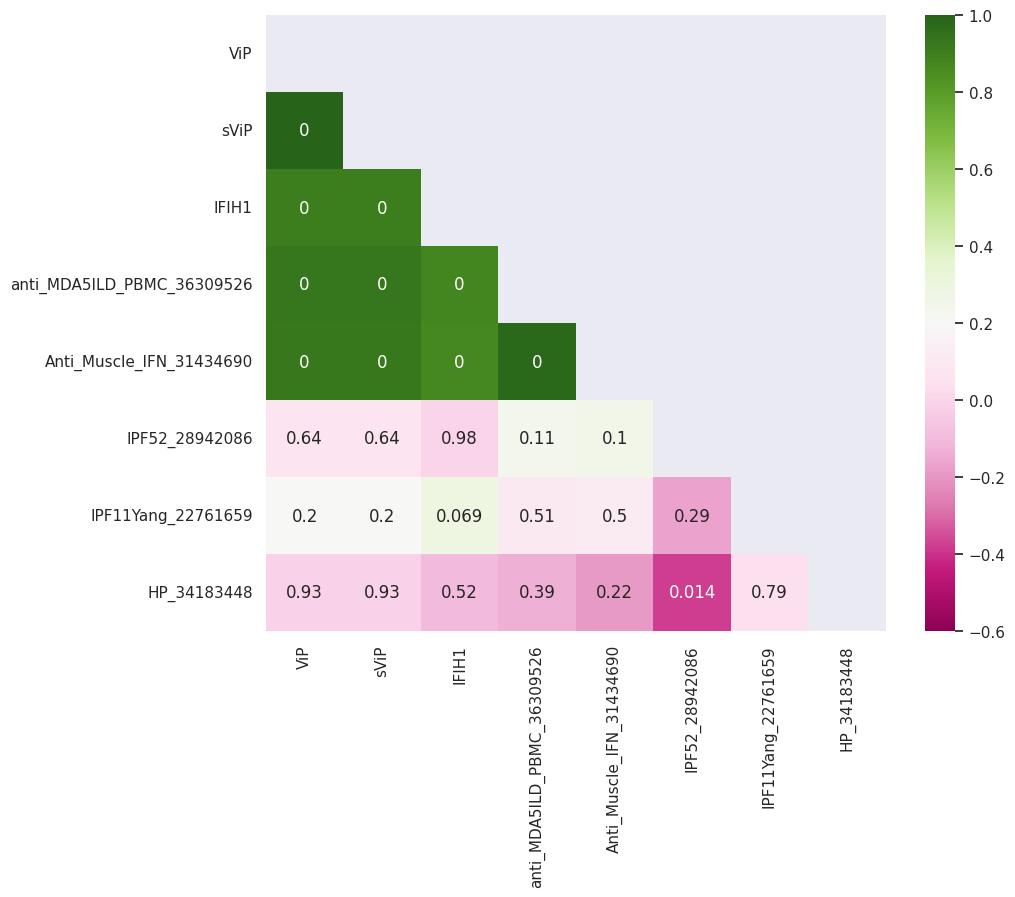

In [45]:
import pandas as pd
import matplotlib
from scipy import stats
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/scatter/GSE168400.pdf"
pdf = getPDF(cfile)

sns.set (rc = {'figure.figsize':(10, 8)})

df = pd.read_csv('Reg_R_GSE168400.txt', sep='\t', index_col=0)
df = df.iloc[: , :-1]
df1 = pd.read_csv('Reg_p_GSE168400.txt', sep='\t', index_col=0)
df1 = df1.iloc[: , :-1]
Y=list(df.index)
X=list(df.columns)
df
#sns.diverging_palette(145, 300, s=60, as_cmap=True)

mask = np.triu(np.ones_like(df, dtype=bool))

sns.heatmap(df,cmap ='PiYG',vmax=1,vmin=-0.6, annot=df1,xticklabels=X, yticklabels=Y,mask=mask)

pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [58]:
import pandas as pd
#data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe.txt', sep='\t', index_col=0)

data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe_GSE177025_UT.txt', sep='\t', index_col=0)
#data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe_Jaitovich2020.txt', sep='\t', index_col=0)
data1 = data1.iloc[: , :-1]


#data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/CoV/GSE157103/Jaitovich-2020-cov-survival.txt', sep='\t', index_col=0)

data2 = pd.read_csv('/booleanfs2/sahoo/Data/BooleanLab/Saptarshi/GSE177025/GSE177025-GPL23934-survival.txt', sep='\t', index_col=0)
#data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/Validation/Bermejo-Martin-2010-flu-survival.txt', sep='\t')
data2 = data2.iloc[: , :-1]
#data2 = data2.set_index('ArrayID', drop=True)
data2
df = pd.merge(data1, data2, left_index=True, right_index=True)
df
#df.to_csv('test.txt', sep='\t')

,ViP,sViP,IFIH1,anti_MDA5ILD_PBMC_36309526,Anti_Muscle_IFN_31434690,IPF52_28942086,IPF11Yang_22761659,HP_34183448,time,status,...,c organism (ch1),c taxid (ch1),c subject id (ch1),c ifih1-rs1990760 (ch1),c corticosteroids treatment (ch1),c tissue (ch1),c molecule (ch1),sex,age,PaFi_1
GSM5370588,-21.485977,-21.485977,0.036932,-0.408962,-0.050961,-2.146540,1.913100,-3.326311,NaN,NaN,...,Homo sapiens,9606,Patient 43,CT,0,blood,total RNA,0,74,201.666667
GSM5370589,-30.314165,-30.314165,-0.453762,-1.236982,0.642516,-0.638788,0.313823,-8.588000,NaN,NaN,...,Homo sapiens,9606,Patient 44,TT,0,blood,total RNA,0,60,267.500000
GSM5370590,-43.947318,-43.947318,-0.780029,-2.230060,-2.153695,-1.858977,0.100908,-7.612060,NaN,NaN,...,Homo sapiens,9606,Patient 45,CT,1,blood,total RNA,0,75,NaN
GSM5370591,-30.881965,-30.881965,-0.440762,-2.029803,-0.305747,-1.656149,-0.466114,-7.844415,NaN,NaN,...,Homo sapiens,9606,Patient 46,CT,0,blood,total RNA,1,78,343.333333
GSM5370592,-48.957402,-48.957402,-0.857471,-4.271128,-1.665700,-1.179415,-2.057088,-6.955841,NaN,NaN,...,Homo sapiens,9606,Patient 47,CC,1,blood,total RNA,0,71,265.428571
GSM5370593,-75.957261,-75.957261,-0.984966,-8.401137,-7.965358,-1.730686,-2.045748,-5.697543,NaN,NaN,...,Homo sapiens,9606,Patient 48,CT,1,blood,total RNA,0,69,168.000000
GSM5370594,-38.699770,-38.699770,-0.489271,-5.547242,-3.584652,-2.238244,-3.144866,-2.500152,NaN,NaN,...,Homo sapiens,9606,Patient 49,TT,0,blood,total RNA,1,68,284.000000
GSM5370595,-47.314911,-47.314911,0.089332,-4.642221,-3.056064,-2.642075,-2.518528,-8.272523,NaN,NaN,...,Homo sapiens,9606,Patient 50,TT,1,blood,total RNA,0,67,285.428571
GSM5370596,-39.748472,-39.748472,-0.561159,-5.062369,-3.239971,-1.826018,0.985084,-6.409531,NaN,NaN,...,Homo sapiens,9606,Patient 51,CC,1,blood,total RNA,0,66,194.500000
GSM5370597,-31.681368,-31.681368,-0.162269,-3.626717,-2.020074,-1.946177,1.823956,-8.579117,NaN,NaN,...,Homo sapiens,9606,Patient 52,TT,0,blood,total RNA,0,66,165.600000


In [60]:
dfUT=df.loc[df['c corticosteroids treatment (ch1)'] == 0]
df=dfUT
#df

In [61]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#data = pd.read_csv('GSE168400_2.txt', sep='\t')
F = open('Reg_R_GSE177025_UT.txt','w')
F1 = open('Reg_p_GSE177025_UT.txt','w')
A=['ViP', 'sViP', 'IFIH1', 'anti_MDA5ILD_PBMC_36309526', 'Anti_Muscle_IFN_31434690', 'IPF52_28942086', 'IPF11Yang_22761659', 'HP_34183448']
F.write('\t')
F1.write('\t')
for k in A:
    F.write('%s\t'%(k))
    F1.write('%s\t'%(k))
F.write('\n')
F1.write('\n')
for i in A:
    F.write('%s\t'%(i))
    F1.write('%s\t'%(i))
    for j in A:    
        slope, intercept, r_value, p_value, std_err = stats.linregress(df[i],df[j])
        #print (r_value)
        F.write('%f\t'%(r_value))
        F1.write('%f\t'%(p_value))
    F.write('\n')
    F1.write('\n')
F.close()
F1.close()

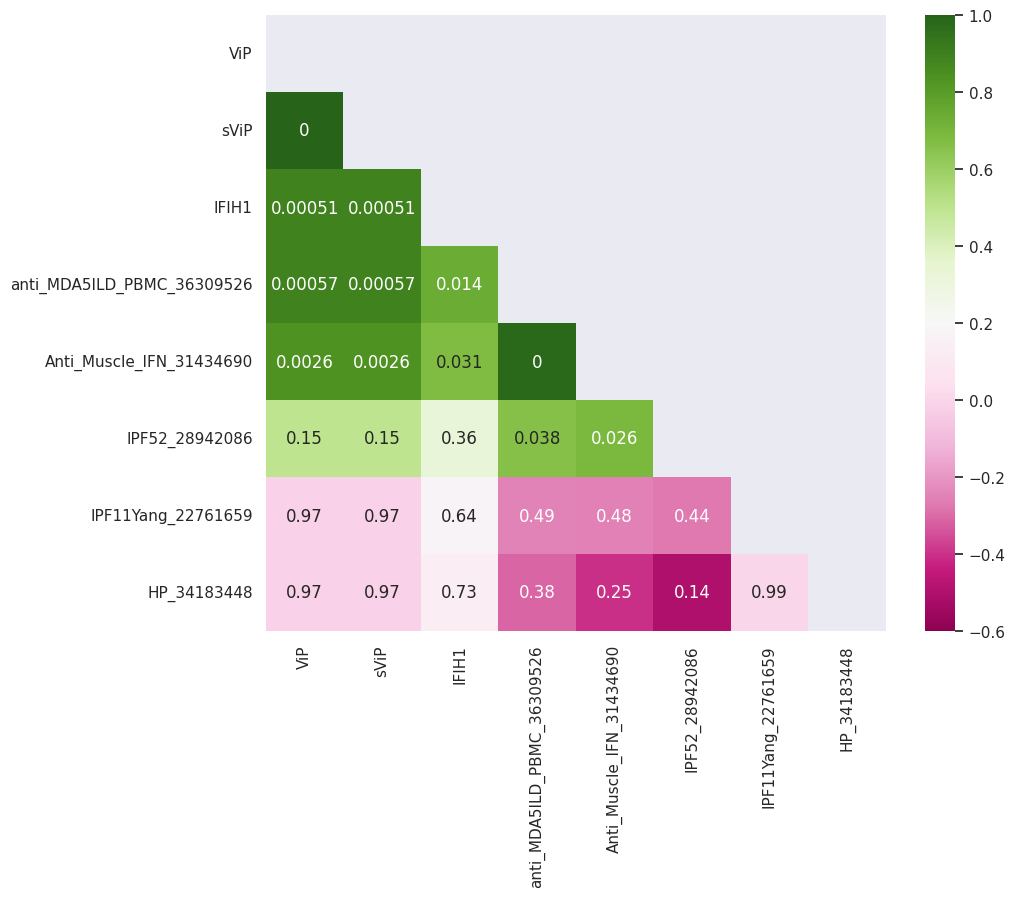

In [62]:
import pandas as pd
import matplotlib
from scipy import stats
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/scatter/GSE177025_UT.pdf"
pdf = getPDF(cfile)

sns.set (rc = {'figure.figsize':(10, 8)})

df = pd.read_csv('Reg_R_GSE177025_UT.txt', sep='\t', index_col=0)
df = df.iloc[: , :-1]
df1 = pd.read_csv('Reg_p_GSE177025_UT.txt', sep='\t', index_col=0)
df1 = df1.iloc[: , :-1]
Y=list(df.index)
X=list(df.columns)
df
#sns.diverging_palette(145, 300, s=60, as_cmap=True)

mask = np.triu(np.ones_like(df, dtype=bool))

sns.heatmap(df,cmap ='PiYG',vmax=1,vmin=-0.6, annot=df1,xticklabels=X, yticklabels=Y,mask=mask)

pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [63]:
import pandas as pd
#data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe.txt', sep='\t', index_col=0)

data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe_GSE177025_T.txt', sep='\t', index_col=0)
#data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe_Jaitovich2020.txt', sep='\t', index_col=0)
data1 = data1.iloc[: , :-1]


#data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/CoV/GSE157103/Jaitovich-2020-cov-survival.txt', sep='\t', index_col=0)

data2 = pd.read_csv('/booleanfs2/sahoo/Data/BooleanLab/Saptarshi/GSE177025/GSE177025-GPL23934-survival.txt', sep='\t', index_col=0)
#data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/Validation/Bermejo-Martin-2010-flu-survival.txt', sep='\t')
data2 = data2.iloc[: , :-1]
#data2 = data2.set_index('ArrayID', drop=True)
data2
df = pd.merge(data1, data2, left_index=True, right_index=True)
df
#df.to_csv('test.txt', sep='\t')

,ViP,sViP,IFIH1,anti_MDA5ILD_PBMC_36309526,Anti_Muscle_IFN_31434690,IPF52_28942086,IPF11Yang_22761659,HP_34183448,time,status,...,c organism (ch1),c taxid (ch1),c subject id (ch1),c ifih1-rs1990760 (ch1),c corticosteroids treatment (ch1),c tissue (ch1),c molecule (ch1),sex,age,PaFi_1
GSM5370588,-21.485977,-21.485977,0.036932,-0.408962,-0.050961,-2.146540,1.913100,-3.326311,NaN,NaN,...,Homo sapiens,9606,Patient 43,CT,0,blood,total RNA,0,74,201.666667
GSM5370589,-30.314165,-30.314165,-0.453762,-1.236982,0.642516,-0.638788,0.313823,-8.588000,NaN,NaN,...,Homo sapiens,9606,Patient 44,TT,0,blood,total RNA,0,60,267.500000
GSM5370590,-43.947318,-43.947318,-0.780029,-2.230060,-2.153695,-1.858977,0.100908,-7.612060,NaN,NaN,...,Homo sapiens,9606,Patient 45,CT,1,blood,total RNA,0,75,NaN
GSM5370591,-30.881965,-30.881965,-0.440762,-2.029803,-0.305747,-1.656149,-0.466114,-7.844415,NaN,NaN,...,Homo sapiens,9606,Patient 46,CT,0,blood,total RNA,1,78,343.333333
GSM5370592,-48.957402,-48.957402,-0.857471,-4.271128,-1.665700,-1.179415,-2.057088,-6.955841,NaN,NaN,...,Homo sapiens,9606,Patient 47,CC,1,blood,total RNA,0,71,265.428571
GSM5370593,-75.957261,-75.957261,-0.984966,-8.401137,-7.965358,-1.730686,-2.045748,-5.697543,NaN,NaN,...,Homo sapiens,9606,Patient 48,CT,1,blood,total RNA,0,69,168.000000
GSM5370594,-38.699770,-38.699770,-0.489271,-5.547242,-3.584652,-2.238244,-3.144866,-2.500152,NaN,NaN,...,Homo sapiens,9606,Patient 49,TT,0,blood,total RNA,1,68,284.000000
GSM5370595,-47.314911,-47.314911,0.089332,-4.642221,-3.056064,-2.642075,-2.518528,-8.272523,NaN,NaN,...,Homo sapiens,9606,Patient 50,TT,1,blood,total RNA,0,67,285.428571
GSM5370596,-39.748472,-39.748472,-0.561159,-5.062369,-3.239971,-1.826018,0.985084,-6.409531,NaN,NaN,...,Homo sapiens,9606,Patient 51,CC,1,blood,total RNA,0,66,194.500000
GSM5370597,-31.681368,-31.681368,-0.162269,-3.626717,-2.020074,-1.946177,1.823956,-8.579117,NaN,NaN,...,Homo sapiens,9606,Patient 52,TT,0,blood,total RNA,0,66,165.600000


In [64]:
dfT=df.loc[df['c corticosteroids treatment (ch1)'] == 1]
df=dfT

In [65]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#data = pd.read_csv('GSE168400_2.txt', sep='\t')
F = open('Reg_R_GSE177025_T.txt','w')
F1 = open('Reg_p_GSE177025_T.txt','w')
A=['ViP', 'sViP', 'IFIH1', 'anti_MDA5ILD_PBMC_36309526', 'Anti_Muscle_IFN_31434690', 'IPF52_28942086', 'IPF11Yang_22761659', 'HP_34183448']
F.write('\t')
F1.write('\t')
for k in A:
    F.write('%s\t'%(k))
    F1.write('%s\t'%(k))
F.write('\n')
F1.write('\n')
for i in A:
    F.write('%s\t'%(i))
    F1.write('%s\t'%(i))
    for j in A:    
        slope, intercept, r_value, p_value, std_err = stats.linregress(df[i],df[j])
        #print (r_value)
        F.write('%f\t'%(r_value))
        F1.write('%f\t'%(p_value))
    F.write('\n')
    F1.write('\n')
F.close()
F1.close()

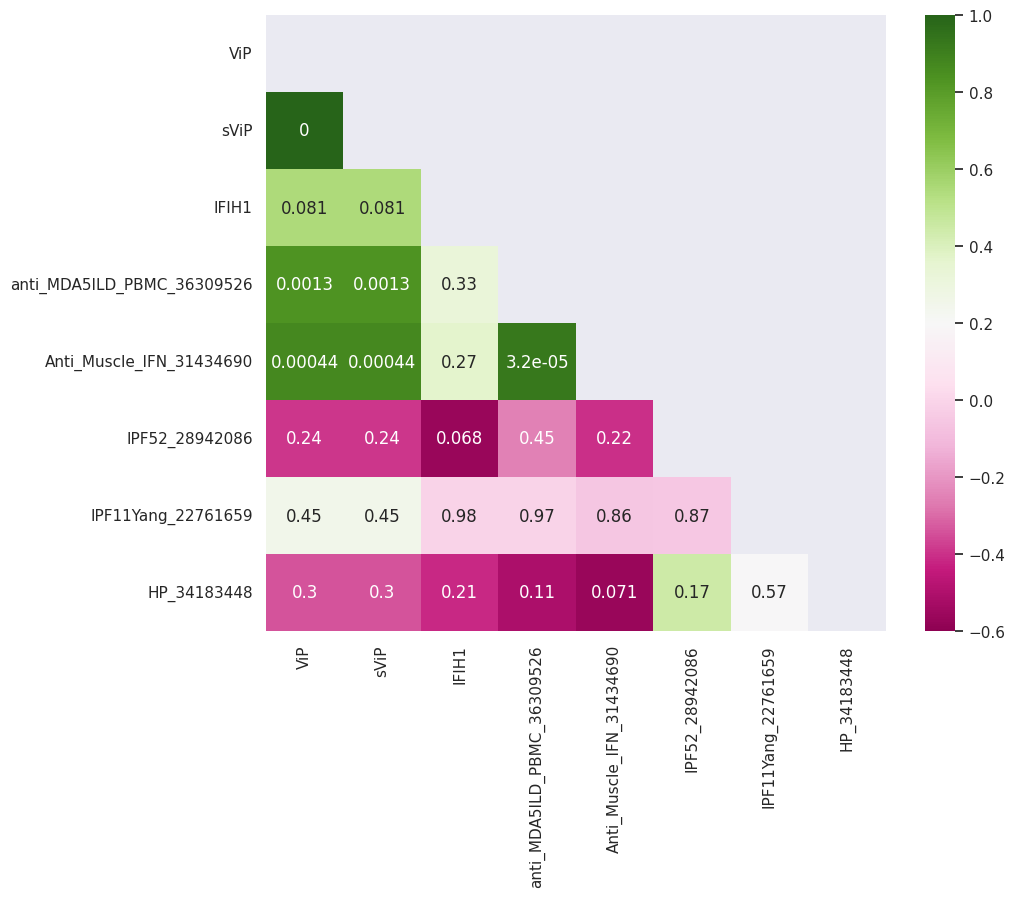

In [66]:
import pandas as pd
import matplotlib
from scipy import stats
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/scatter/GSE177025_T.pdf"
pdf = getPDF(cfile)

sns.set (rc = {'figure.figsize':(10, 8)})

df = pd.read_csv('Reg_R_GSE177025_T.txt', sep='\t', index_col=0)
df = df.iloc[: , :-1]
df1 = pd.read_csv('Reg_p_GSE177025_T.txt', sep='\t', index_col=0)
df1 = df1.iloc[: , :-1]
Y=list(df.index)
X=list(df.columns)
df
#sns.diverging_palette(145, 300, s=60, as_cmap=True)

mask = np.triu(np.ones_like(df, dtype=bool))

sns.heatmap(df,cmap ='PiYG',vmax=1,vmin=-0.6, annot=df1,xticklabels=X, yticklabels=Y,mask=mask)

pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [29]:
import pandas as pd
#data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe.txt', sep='\t', index_col=0)

data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe_GSE157103.txt', sep='\t', index_col=0)
#data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe_Jaitovich2020.txt', sep='\t', index_col=0)
data1 = data1.iloc[: , :-1]


#data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/CoV/GSE157103/Jaitovich-2020-cov-survival.txt', sep='\t', index_col=0)

data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/CoV/GSE157103/Jaitovich-2020-cov-survival.txt', sep='\t', index_col=0)
#data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/Validation/Bermejo-Martin-2010-flu-survival.txt', sep='\t')
data2 = data2.iloc[: , :-1]
#data2 = data2.set_index('ArrayID', drop=True)
data2
df = pd.merge(data1, data2, left_index=True, right_index=True)
df
#df.to_csv('test.txt', sep='\t')

,ViP,sViP,IFIH1,anti_MDA5ILD_PBMC_36309526,Anti_Muscle_IFN_31434690,IPF52_28942086,IPF11Yang_22761659,HP_34183448,time,status,...,c lactate (mmol/l),c fibrinogen,c sofa,c associated controlled-vocabulary terms,c cell type,c tissue of origin,c sample type,c desc,c BioSample,c SRA
GSM4753021,-122.058312,-122.058312,0.584636,6.770713,5.009562,-1.058695,-2.818722,-23.218826,0,1,...,0.9,513,8,DOID:0080600 UBERON:0003101 NCIT:C70909 CL:000...,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033799
GSM4753022,-184.882717,-184.882717,-0.032203,-1.461895,-2.066688,-0.492479,2.197901,-25.092539,39,1,...,unknown,unknown,unknown,DOID:0080600 UBERON:0003101 CL:0000738 NCIT:C1...,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033800
GSM4753023,-140.206871,-140.206871,0.554915,6.197901,6.273272,-0.288259,-2.938813,-29.098230,18,1,...,unknown,513,unknown,DOID:0080600 UBERON:0003101 CL:0000738 NCIT:C1...,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033801
GSM4753024,-178.683401,-178.683401,-0.036724,-1.886390,-2.482997,-2.776961,-1.181743,-21.225693,39,1,...,0.87,949,unknown,DOID:0080600 UBERON:0003101 CL:0000738 NCIT:C1...,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033802
GSM4753025,-158.840083,-158.840083,0.381778,1.824460,2.078156,0.321992,-4.179346,-27.403659,27,1,...,1.48,929,7,DOID:0080600 UBERON:0003101 NCIT:C70909 CL:000...,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4753142,-256.256234,-256.256234,-0.647106,-6.807719,-8.230041,-3.402673,-4.424749,-33.564552,43,1,...,unknown,unknown,1,DOID:4 UBERON:0003101 CL:0000738 NCIT:C12529,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033920
GSM4753143,-192.720173,-192.720173,-0.112592,0.294222,0.617377,-2.786698,-4.231002,-32.523333,40,1,...,1.99,635,unknown,DOID:4 UBERON:0003100 CL:0000738 NCIT:C12529,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033921
GSM4753144,-199.419049,-199.419049,-0.159189,-3.688672,-4.317570,-2.817970,-2.246566,-25.843162,43,1,...,0.87,unknown,unknown,DOID:4 UBERON:0003100 CL:0000738 NCIT:C12529,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033922
GSM4753145,-240.333816,-240.333816,-0.387981,-1.252687,-2.942003,-5.236454,-4.740417,-33.254802,44,1,...,0.99,unknown,unknown,DOID:4 UBERON:0003101 CL:0000738 NCIT:C12529,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033923


In [30]:
dficu=df.loc[df['c icu'] == 'yes']
df=dficu
#dfnoicu=dfCOVID.loc[df['c icu'] == 'no']

In [31]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#data = pd.read_csv('GSE168400_2.txt', sep='\t')
F = open('Reg_R_GSE157103_icu.txt','w')
F1 = open('Reg_p_GSE157103_icu.txt','w')
A=['ViP', 'sViP', 'IFIH1', 'anti_MDA5ILD_PBMC_36309526', 'Anti_Muscle_IFN_31434690', 'IPF52_28942086', 'IPF11Yang_22761659', 'HP_34183448']
F.write('\t')
F1.write('\t')
for k in A:
    F.write('%s\t'%(k))
    F1.write('%s\t'%(k))
F.write('\n')
F1.write('\n')
for i in A:
    F.write('%s\t'%(i))
    F1.write('%s\t'%(i))
    for j in A:    
        slope, intercept, r_value, p_value, std_err = stats.linregress(df[i],df[j])
        #print (r_value)
        F.write('%f\t'%(r_value))
        F1.write('%f\t'%(p_value))
    F.write('\n')
    F1.write('\n')
F.close()
F1.close()

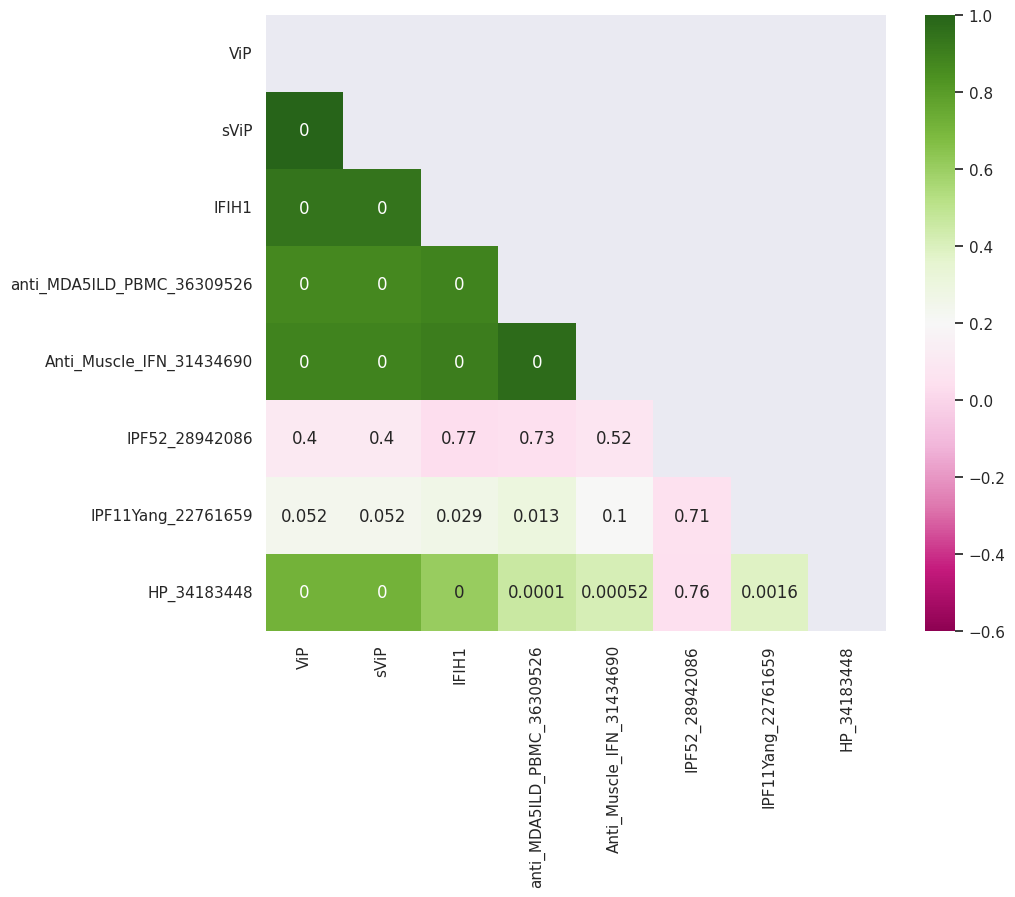

In [33]:
import pandas as pd
import matplotlib
from scipy import stats
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/scatter/GSE157103_icu.pdf"
pdf = getPDF(cfile)

sns.set (rc = {'figure.figsize':(10, 8)})

df = pd.read_csv('Reg_R_GSE157103_icu.txt', sep='\t', index_col=0)
df = df.iloc[: , :-1]
df1 = pd.read_csv('Reg_p_GSE157103_icu.txt', sep='\t', index_col=0)
df1 = df1.iloc[: , :-1]
Y=list(df.index)
X=list(df.columns)
df
#sns.diverging_palette(145, 300, s=60, as_cmap=True)

mask = np.triu(np.ones_like(df, dtype=bool))

sns.heatmap(df,cmap ='PiYG',vmax=1,vmin=-0.6, annot=df1,xticklabels=X, yticklabels=Y,mask=mask)

pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [38]:
import pandas as pd
#data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe.txt', sep='\t', index_col=0)

data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe_GSE157103.txt', sep='\t', index_col=0)
#data1 = pd.read_csv('/Users/sinha7290/public_html/BoNE/composite_dataframe_Jaitovich2020.txt', sep='\t', index_col=0)
data1 = data1.iloc[: , :-1]


#data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/CoV/GSE157103/Jaitovich-2020-cov-survival.txt', sep='\t', index_col=0)

data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/CoV/GSE157103/Jaitovich-2020-cov-survival.txt', sep='\t', index_col=0)
#data2 = pd.read_csv('/booleanfs2/sahoo/Data/Macrophage/Validation/Bermejo-Martin-2010-flu-survival.txt', sep='\t')
data2 = data2.iloc[: , :-1]
#data2 = data2.set_index('ArrayID', drop=True)
data2
df = pd.merge(data1, data2, left_index=True, right_index=True)
df
#df.to_csv('test.txt', sep='\t')

,ViP,sViP,IFIH1,anti_MDA5ILD_PBMC_36309526,Anti_Muscle_IFN_31434690,IPF52_28942086,IPF11Yang_22761659,HP_34183448,time,status,...,c lactate (mmol/l),c fibrinogen,c sofa,c associated controlled-vocabulary terms,c cell type,c tissue of origin,c sample type,c desc,c BioSample,c SRA
GSM4753021,-122.058312,-122.058312,0.584636,6.770713,5.009562,-1.058695,-2.818722,-23.218826,0,1,...,0.9,513,8,DOID:0080600 UBERON:0003101 NCIT:C70909 CL:000...,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033799
GSM4753022,-184.882717,-184.882717,-0.032203,-1.461895,-2.066688,-0.492479,2.197901,-25.092539,39,1,...,unknown,unknown,unknown,DOID:0080600 UBERON:0003101 CL:0000738 NCIT:C1...,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033800
GSM4753023,-140.206871,-140.206871,0.554915,6.197901,6.273272,-0.288259,-2.938813,-29.098230,18,1,...,unknown,513,unknown,DOID:0080600 UBERON:0003101 CL:0000738 NCIT:C1...,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033801
GSM4753024,-178.683401,-178.683401,-0.036724,-1.886390,-2.482997,-2.776961,-1.181743,-21.225693,39,1,...,0.87,949,unknown,DOID:0080600 UBERON:0003101 CL:0000738 NCIT:C1...,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033802
GSM4753025,-158.840083,-158.840083,0.381778,1.824460,2.078156,0.321992,-4.179346,-27.403659,27,1,...,1.48,929,7,DOID:0080600 UBERON:0003101 NCIT:C70909 CL:000...,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM4753142,-256.256234,-256.256234,-0.647106,-6.807719,-8.230041,-3.402673,-4.424749,-33.564552,43,1,...,unknown,unknown,1,DOID:4 UBERON:0003101 CL:0000738 NCIT:C12529,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033920
GSM4753143,-192.720173,-192.720173,-0.112592,0.294222,0.617377,-2.786698,-4.231002,-32.523333,40,1,...,1.99,635,unknown,DOID:4 UBERON:0003100 CL:0000738 NCIT:C12529,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033921
GSM4753144,-199.419049,-199.419049,-0.159189,-3.688672,-4.317570,-2.817970,-2.246566,-25.843162,43,1,...,0.87,unknown,unknown,DOID:4 UBERON:0003100 CL:0000738 NCIT:C12529,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033922
GSM4753145,-240.333816,-240.333816,-0.387981,-1.252687,-2.942003,-5.236454,-4.740417,-33.254802,44,1,...,0.99,unknown,unknown,DOID:4 UBERON:0003101 CL:0000738 NCIT:C12529,leukocyte,whole blood,primary cells,genes.tpm.tsv,https://www.ncbi.nlm.nih.gov/biosample/SAMN159...,https://www.ncbi.nlm.nih.gov/sra?term=SRX9033923


In [39]:
dfnoicu=df.loc[df['c icu'] == 'no']
df=dfnoicu
#dfnoicu=dfCOVID.loc[df['c icu'] == 'no']

In [40]:
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#data = pd.read_csv('GSE168400_2.txt', sep='\t')
F = open('Reg_R_GSE157103_noicu.txt','w')
F1 = open('Reg_p_GSE157103_noicu.txt','w')
A=['ViP', 'sViP', 'IFIH1', 'anti_MDA5ILD_PBMC_36309526', 'Anti_Muscle_IFN_31434690', 'IPF52_28942086', 'IPF11Yang_22761659', 'HP_34183448']
F.write('\t')
F1.write('\t')
for k in A:
    F.write('%s\t'%(k))
    F1.write('%s\t'%(k))
F.write('\n')
F1.write('\n')
for i in A:
    F.write('%s\t'%(i))
    F1.write('%s\t'%(i))
    for j in A:    
        slope, intercept, r_value, p_value, std_err = stats.linregress(df[i],df[j])
        #print (r_value)
        F.write('%f\t'%(r_value))
        F1.write('%f\t'%(p_value))
    F.write('\n')
    F1.write('\n')
F.close()
F1.close()

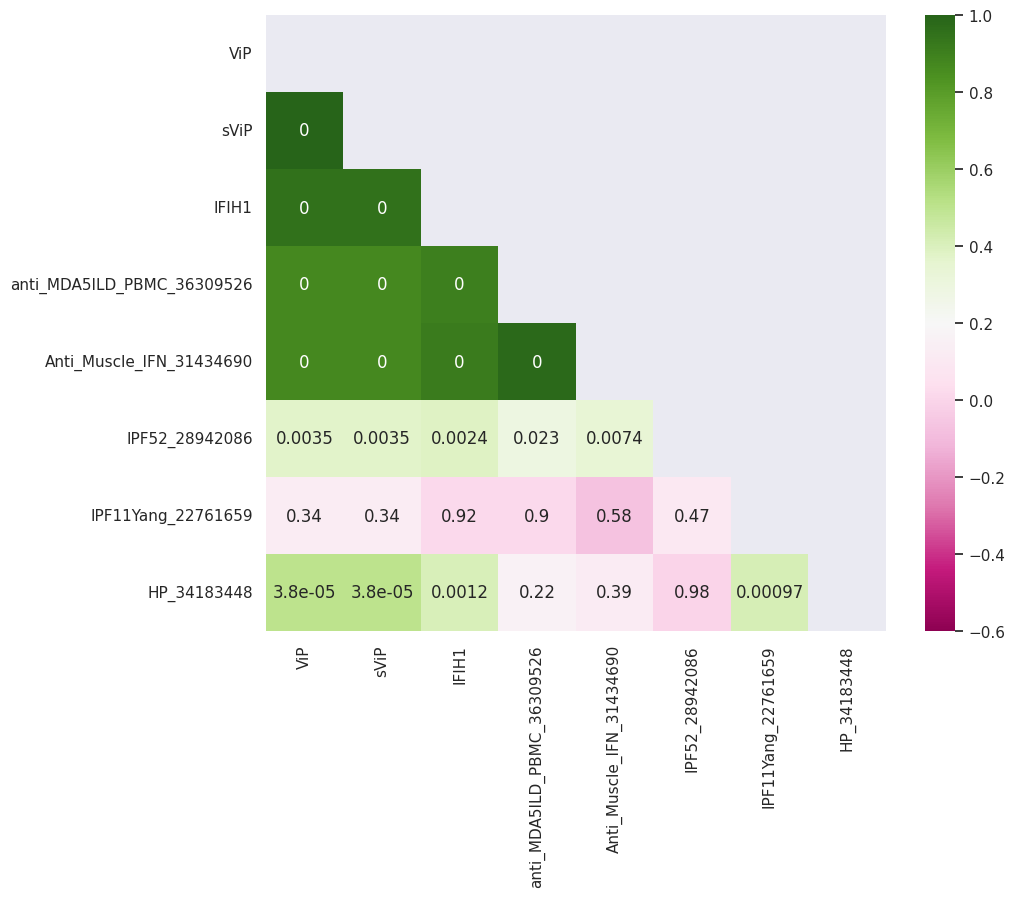

In [41]:
import pandas as pd
import matplotlib
from scipy import stats
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Saptarshi'
    d['Subject'] = "heatmap"
    d['Keywords'] = 'heatmap'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
    
cfile = "/Users/sinha7290/public_html/BoNE/scatter/GSE157103_noicu.pdf"
pdf = getPDF(cfile)

sns.set (rc = {'figure.figsize':(10, 8)})

df = pd.read_csv('Reg_R_GSE157103_noicu.txt', sep='\t', index_col=0)
df = df.iloc[: , :-1]
df1 = pd.read_csv('Reg_p_GSE157103_noicu.txt', sep='\t', index_col=0)
df1 = df1.iloc[: , :-1]
Y=list(df.index)
X=list(df.columns)
df
#sns.diverging_palette(145, 300, s=60, as_cmap=True)

mask = np.triu(np.ones_like(df, dtype=bool))

sns.heatmap(df,cmap ='PiYG',vmax=1,vmin=-0.6, annot=df1,xticklabels=X, yticklabels=Y,mask=mask)

pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)